# Data Science CoderHouse 60905


### Alumno: Jorge Pastoriza

##Introducción
El analisis y sosten de los clientes es fundamental para cualquier entidad finaciera, junto con el mantenimiento de la cartera tambien es clave la oferta de nuevos productos para lograr mayor fidelizacion de la cartera.

## Descripción del Problema

Todos los bancos quieren mantener a sus clientes para mantener su negocio y, por lo tanto, este banco multinacional anónimo.

A continuación se muestran los datos de los clientes de los titulares de cuentas en Anonymous Multinational Bank y el objetivo de los datos será predecir la pérdida de clientes..

## Objetivo

El objetivo de este primer trabajo es plantear un primer analisis de como se encuentra actualmente la cartera de clientes del banco, presentanto distribuicion de edades, cantidad de productos, el score crediticio actual, etc.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

Este conjunto de datos proporciona información detallada sobre....

## Importación de Librerías y Carga de Datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Customer-Churn-Records.csv", sep=",")

## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

El conjunto de datos contiene un total de 10.000 filas (registros) y 18 columnas (variables).

El dataset es consistente ya que no cuenta con valores nulos.



---



**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir la posible perdida del cliente son:  "CreditScore", "Balance", "NumOfProducts", "IsActiveMember" y "Satisfaction Score"

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


**Satisfaction Score:**
- El score promedio de satisfaccion es de 3,01 por lo que resulta un dato interesante para relevar sobre que items el cliente no se encuentra satisfecho.


**NumOfProductos:**
- Se verifica que en promedio la cartera de clientes tiene 1,5 productos, lo cual resulta bajo considerando que el maximo es de 4 productos.

**CreditScore:**
- Se puede entender que la cartera es sana teniendo en cuenta que el Score crediticio promedio es de 650.


In [ ]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


### Hipótesis planteadas

1.   Existe un alto nivel de clientes monoproducto.
2.   El score crediticio en general es de una cartera sana.
3.   




###Analisis Score Crediticio de acuerdo a la edad:

<ipython-input-11-20a4c82a9fd7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  edadBalance = df.groupby("Age")["CreditScore", "NumOfProducts"].mean().round(0)


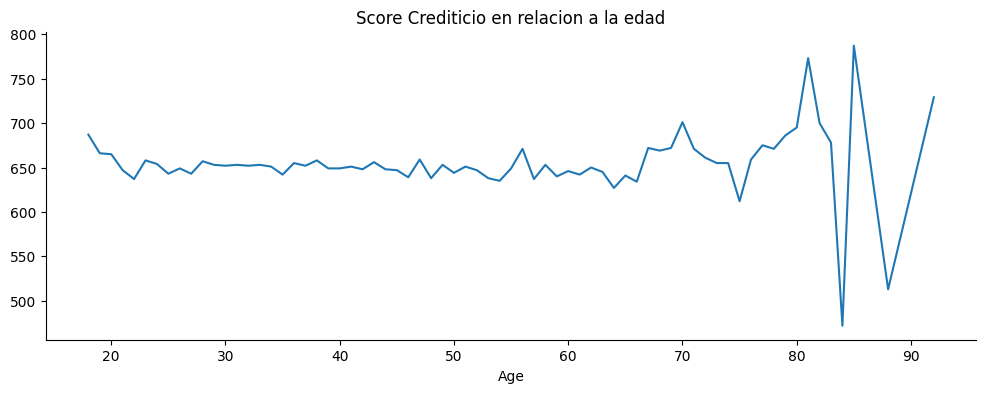

In [ ]:
# Agrupo los datos para analizar el Score por edad
edadBalance = df.groupby("Age")["CreditScore", "NumOfProducts"].mean().round(0)
edadBalance['CreditScore'].plot(kind='line', figsize=(12, 4), title='Score Crediticio en relacion a la edad')
plt.gca().spines[['top', 'right']].set_visible(False)

No hay una clara diferencia entre la población que defaultea o no un crédito en la apertura por género.

###Distribucion de cantidad de productos contratados:



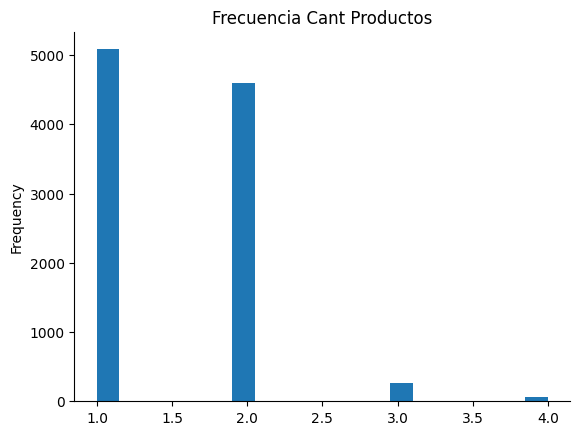

In [ ]:
# Agrupacion visual de clientes por cantidad de productos contratados
df['NumOfProducts'].plot(kind='hist', bins=20, title='Frecuencia Cant Productos')
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observa que el banco cuenta con muchos clientes monoproducto, lo cual trae aparejado la facilidad que estos puedan perderse.

###Cantidad de productos contratados y nivel de Balance:



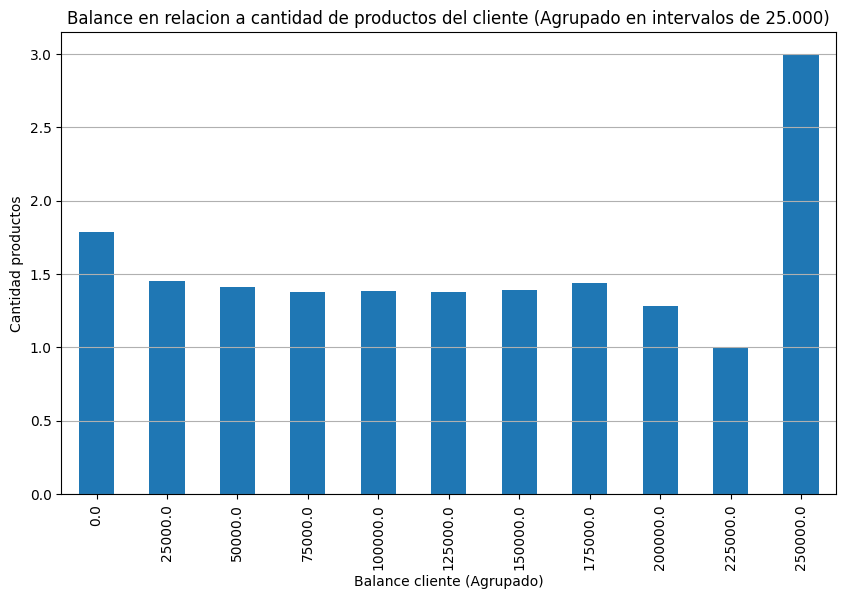

In [ ]:
# Crear una nueva columna para los niveles de ingresos agrupados
df['BalanceGroup'] = (df['Balance'] // 25000) * 25000

# Calcular el promedio de balance de acuerdo a los productos contratados
balanceProductos = df.groupby('BalanceGroup')['NumOfProducts'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
balanceProductos.plot(kind='bar', rot=90)
plt.xlabel('Balance cliente (Agrupado)')
plt.ylabel('Cantidad productos')
plt.title('Balance en relacion a cantidad de productos del cliente (Agrupado en intervalos de 25.000)')
plt.grid(axis='y')

plt.show()


Los clientes con mayor balance son aquellos que tienen 3 productos contratados. Tambien es para destacar la nula observacion de clientes con 4 productos.
